In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [7]:
# Reading the Mouse data into a dataframe
mouse_data=pd.read_csv(mouse_drug_data_to_load)
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [ ]:
# Reading the clinical trial data into a dataframe
clinicaltrial_data=pd.read_csv(clinical_trial_data_to_load)
clinicaltrial_data.head()

In [10]:
# Combining the data into a single dataset
combineddf=pd.merge(mouse_data, clinicaltrial_data, on='Mouse ID')
# Display the data table for preview
combineddf.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [53]:
# initializing two empty dataframes which will be filled with tumor volume data by Timepoint and drug kind
store = pd.DataFrame(columns=('Drug', 'Timepoint', 'Tumor Volume (mm3)'))
error = pd.DataFrame(columns=('Drug', 'Timepoint', 'Tumor Volume (mm3)'))
#list with all the drug names
drugs=["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
externalcounter=0
# the below code loops over each drug kind, and each timepoint
for drug in drugs:
    for i in range(0,10):
        #finds the tumor volume for the specified drug and timepoint
        qt=combineddf.loc[combineddf["Drug"]== drug,:].loc[combineddf["Timepoint"]==i*5,:]
        #stores data into prior initialized dataframe as a new row
        store.loc[externalcounter]=[drug, i*5, qt["Tumor Volume (mm3)"].mean()]
        #for the error bars
        error.loc[externalcounter]=[drug, i*5, qt["Tumor Volume (mm3)"].sem()]
        externalcounter=externalcounter+1

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [75]:
#initalizing completely blank dataframes for the data munging part of the code
munged = pd.DataFrame()
mungederror=pd.DataFrame()
# initializing both dataframes with the timepoints (0 to 45 days)
munged["Timepoint"]=list(store.loc[0:9,"Timepoint"])
mungederror["Timepoint"]=list(store.loc[0:9,"Timepoint"])

In [ ]:
for drug in drugs:
    # new columns for each drug are added to the munged dataframes
    munged[drug]=list(store.loc[store["Drug"]==drug,"Tumor Volume (mm3)"])
    mungederror[drug]=list(error.loc[store["Drug"]==drug,"Tumor Volume (mm3)"])

In [257]:
# just for visualization
munged

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
5,25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
6,30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
7,35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
8,40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692
9,45,36.236114,64.132421,65.755562,70.662958,69.265506,68.084082,66.258529,34.955595,68.438310,65.960888


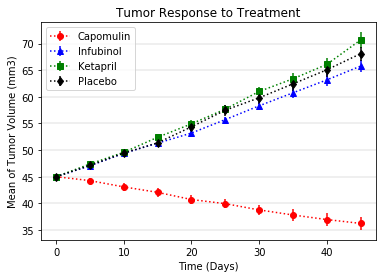

In [102]:
# plotting the four treatments examined
plt.errorbar(munged["Timepoint"], munged['Capomulin'], yerr=mungederror['Capomulin'], fmt='o', marker = 'o', color = 'red', label='Capomulin', linestyle=':')
plt.errorbar(munged["Timepoint"], munged['Infubinol'], yerr=mungederror['Infubinol'], fmt='o', marker = '^', color = 'blue', label='Infubinol', linestyle=':')
plt.errorbar(munged["Timepoint"], munged['Ketapril'], yerr=mungederror['Ketapril'], fmt='o', marker = 's', color = 'green', label='Ketapril', linestyle=':')
plt.errorbar(munged["Timepoint"], munged['Placebo'], yerr=mungederror['Placebo'], fmt='o', marker = 'd', color = 'black', label='Placebo', linestyle=':')
#Below code is self explanatory
plt.legend(loc="best")
plt.title("Tumor Response to Treatment")
plt.xlabel('Time (Days)')
plt.ylabel('Mean of Tumor Volume (mm3)')
plt.grid(axis='y',color='grey',linestyle='-',linewidth=0.25)
plt.savefig('treatment_response.png')
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [103]:
# Pretty much the same schema as before
# initializing two empty dataframes which will be filled with tumor volume data by Timepoint and drug kind
store2 = pd.DataFrame(columns=('Drug', 'Timepoint', 'Metastatic Sites'))
error2 = pd.DataFrame(columns=('Drug', 'Timepoint', 'Metastatic Sites'))
externalcounter=0
# the below code loops over each drug kind, at each timepoint
for drug in drugs:
    for i in range(0,10):
        #finds the rows for a specified drug and time point
        qt2=combineddf.loc[combineddf["Drug"]== drug,:].loc[combineddf["Timepoint"]==i*5,:]
        # stores the metastatic means, and SEM's into the initial empty dataframes
        store2.loc[externalcounter]=[drug, i*5, qt2["Metastatic Sites"].mean()]
        error2.loc[externalcounter]=[drug, i*5, qt2["Metastatic Sites"].sem()]
        externalcounter=externalcounter+1
# visualization
store2.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
5,Capomulin,25,0.818182
6,Capomulin,30,1.090909
7,Capomulin,35,1.181818
8,Capomulin,40,1.380952
9,Capomulin,45,1.476190


In [104]:
#visualization
error2.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [105]:
# Exact same scheme as before to munge the metastatic site data
# initializing empty dataframes
munged2 = pd.DataFrame()
mungederror2 = pd.DataFrame()
# initializing both dataframes with the timepoints (0 to 45 days)
munged2["Timepoint"]=list(store2.loc[0:9,"Timepoint"])
mungederror2["Timepoint"]=list(store2.loc[0:9,"Timepoint"])

for drug in drugs:
    # storing each drug's metastatic site data as a separate column
    munged2[drug]=list(store2.loc[store["Drug"]==drug,"Metastatic Sites"])
    mungederror2[drug]=list(error2.loc[store["Drug"]==drug,"Metastatic Sites"])
# visualization
munged2.head()

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


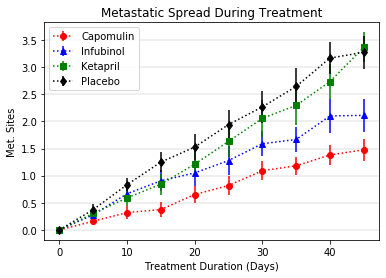

In [106]:
# plotting data
plt.errorbar(munged2["Timepoint"], munged2['Capomulin'], yerr=mungederror2['Capomulin'], fmt='o', marker = 'o', color = 'red', label='Capomulin', linestyle=':')
plt.errorbar(munged2["Timepoint"], munged2['Infubinol'], yerr=mungederror2['Infubinol'], fmt='o', marker = '^', color = 'blue', label='Infubinol', linestyle=':')
plt.errorbar(munged2["Timepoint"], munged2['Ketapril'], yerr=mungederror2['Ketapril'], fmt='o', marker = 's', color = 'green', label='Ketapril', linestyle=':')
plt.errorbar(munged2["Timepoint"], munged2['Placebo'], yerr=mungederror2['Placebo'], fmt='o', marker = 'd', color = 'black', label='Placebo', linestyle=':')
# self-explanatory formatting of plot
plt.legend(loc="best")
plt.title("Metastatic Spread During Treatment")
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid(axis='y',color='grey',linestyle='-',linewidth=0.25)
plt.savefig('metastatic_spread.png')
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [162]:
#total count will be a dictionary holding the intial mouse counts for each drug
totalcount={}
# Empty data frame initialization
store3 = pd.DataFrame(columns=('Drug', 'Timepoint', 'Mouse Survival Rate'))
externalcounter=0

for drug in drugs:
    # finding the initial number of mice being subjected to a specific durg from the mouse_data dataframe
    totalcount[drug]= mouse_data.loc[mouse_data["Drug"]==drug,:].shape[0]
    for i in range (0,10):
        # finding the number of survivors at each timepoint for each drug
        survivors=combineddf.loc[combineddf["Drug"]== drug,:].loc[combineddf["Timepoint"]==i*5,:].shape[0]
        # storing data as a new row in prior initailized dataframe
        store3.loc[externalcounter]=[drug, i*5, survivors/totalcount[drug]*100]  
        externalcounter=externalcounter+1
store3


,Drug,Timepoint,Mouse Survival Rate
0,Capomulin,0,100.0
1,Capomulin,5,100.0
2,Capomulin,10,100.0
3,Capomulin,15,96.0
4,Capomulin,20,92.0
5,Capomulin,25,88.0
6,Capomulin,30,88.0
7,Capomulin,35,88.0
8,Capomulin,40,84.0
9,Capomulin,45,84.0


In [164]:
# data cleanup scheme is exactly the same as prior 2, except there is no error dataframe
munged3 = pd.DataFrame()
munged3["Timepoint"]=list(store3.loc[0:9,"Timepoint"])
for drug in drugs:
    munged3[drug]=list(store3.loc[store["Drug"]==drug,"Mouse Survival Rate"])
munged3.head(10)

,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
1,5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
2,10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
3,15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
4,20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
5,25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
6,30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
7,35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
8,40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0
9,45,84.0,52.0,36.0,44.0,52.0,44.0,28.0,80.0,44.0,56.0


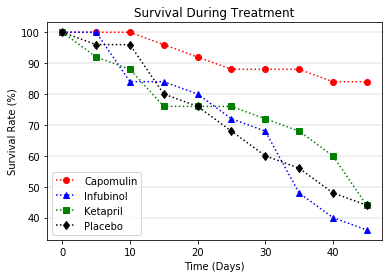

In [166]:
# Plotting data; self-explanatory
plt.errorbar(munged3["Timepoint"], munged3['Capomulin'], fmt='o', marker = 'o', color = 'red', label='Capomulin', linestyle=':')
plt.errorbar(munged3["Timepoint"], munged3['Infubinol'], fmt='o', marker = '^', color = 'blue', label='Infubinol', linestyle=':')
plt.errorbar(munged3["Timepoint"], munged3['Ketapril'], fmt='o', marker = 's', color = 'green', label='Ketapril', linestyle=':')
plt.errorbar(munged3["Timepoint"], munged3['Placebo'], fmt='o', marker = 'd', color = 'black', label='Placebo', linestyle=':')
plt.legend(loc="best")
plt.title("Survival During Treatment")
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.grid(axis='y',color='grey',linestyle='-',linewidth=0.25)
plt.savefig('survival_rate.png')
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [253]:
tumourchangelist=[]
# Getting the tumour volume change for each drug
for drug in drugs:
    tumourchangelist.append((munged[drug][9]-munged[drug][0])/munged[drug][0])
tumourchangelist

[-0.19475302667894173,
 0.4251649185589744,
 0.4612347172785187,
 0.5702879468660608,
 0.5392334713476923,
 0.5129796048315153,
 0.4724117486320637,
 -0.22320900462766674,
 0.5208513428789903,
 0.4657975086509525]

In [254]:
# Putting tumour volume change data into a new dataframe
tumourchangedf=pd.DataFrame(columns=('Drug', 'Percent Change'))
tumourchangedf["Drug"]=drugs
tumourchangedf["Percent Change"]=tumourchangelist
tumourchangedf

,Drug,Percent Change
0,Capomulin,-0.194753
1,Ceftamin,0.425165
2,Infubinol,0.461235
3,Ketapril,0.570288
4,Naftisol,0.539233
5,Placebo,0.512980
6,Propriva,0.472412
7,Ramicane,-0.223209
8,Stelasyn,0.520851
9,Zoniferol,0.465798


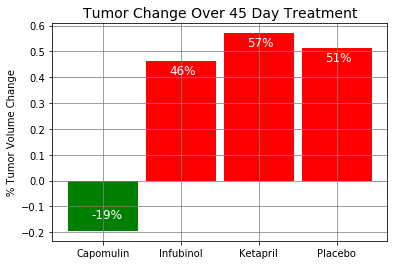

In [256]:
# x labels
drugsequence=["Capomulin", "Infubinol", "Ketapril","Placebo"]
# bar chart heights
height=[float(tumourchangedf.loc[tumourchangedf["Drug"]=="Capomulin", "Percent Change"]), float(tumourchangedf.loc[tumourchangedf["Drug"]=="Infubinol", "Percent Change"]), float(tumourchangedf.loc[tumourchangedf["Drug"]=="Ketapril", "Percent Change"]), float(tumourchangedf.loc[tumourchangedf["Drug"]=="Placebo", "Percent Change"])]
# color scheme
colors=['green','red','red','red']
# bar plot
ax=plt.bar(drugsequence,height,color=colors, width =-0.9, align="center")
plt.grid(axis='both',color='grey',linestyle='-',linewidth=0.75)
plt.ylabel('% Tumor Volume Change')
plt.title("Tumor Change Over 45 Day Treatment", fontsize=14)
# below four lines of code are to make sure that the annotations on the plot are in the right place for each bar
plt.text(ax.patches[0].get_x()-0.6,ax.patches[0].get_height()+0.05, str(int(height[0]*100))+'%',color='white', fontsize=12)
plt.text(ax.patches[1].get_x()-0.6,ax.patches[1].get_height()-0.05, str(int(height[1]*100))+'%',color='white', fontsize=12)
plt.text(ax.patches[2].get_x()-0.6,ax.patches[2].get_height()-0.05, str(int(height[2]*100))+'%',color='white', fontsize=12)
plt.text(ax.patches[3].get_x()-0.6,ax.patches[3].get_height()-0.05, str(int(height[3]*100))+'%',color='white', fontsize=12)
plt.savefig('tumour_volume_change.png')
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)

## Observations

In [250]:
print("1. Capomulin is the most effective treatment against Squamous Cell Carcinoma the four treatments examined")
print("2. Ketapril is the worst treatment among the four examined, even worse than essentially doing nothing (placebo)")
print("3. Infubinol is sleightly better than the Placebo, however the difference is small and may be due to statistical error")

1. Capomulin is the most effective treatment against Squamous Cell Carcinoma the four treatments examined
2. Ketapril is the worst treatment among the four examined, even worse than essentially doing nothing (placebo)
3. Infubinol is sleightly better than the Placebo, however the difference is small and may be due to statistical error
